<a href="https://colab.research.google.com/github/MarAmorosMtz/SamsungInnovationCampus/blob/main/ClasificacionFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.fashion_mnist import load_data

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_train = x_train / 255.0
x_test = x_test.reshape((-1, 28, 28, 1))
x_test = x_test / 255.0

In [ ]:
batch = 8
epochs = 20
learn_rate = 0.0001

In [ ]:
from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=learn_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs = epochs,
    batch_size = batch
)

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 120s 15ms/step - accuracy: 0.6768 - loss: 0.9705
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 116s 15ms/step - accuracy: 0.8317 - loss: 0.4673
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 147s 16ms/step - accuracy: 0.8582 - loss: 0.3916
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 118s 16ms/step - accuracy: 0.8747 - loss: 0.3478
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 117s 16ms/step - accuracy: 0.8863 - loss: 0.3166
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 143s 16ms/step - accuracy: 0.8925 - loss: 0.2972
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 119s 16ms/step - accuracy: 0.9038 - loss: 0.2654
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 145s 16ms/step - accuracy: 0.9071 - loss: 0.2556
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 143s 16ms/step - accuracy: 0.9113 - loss: 0.2412
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 139s 16ms/step - accuracy: 0.9166 - loss: 0.2270
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 141s 16ms/step - accuracy: 0.9256 - loss: 0.20

In [ ]:
import matplotlib.pyplot as plt

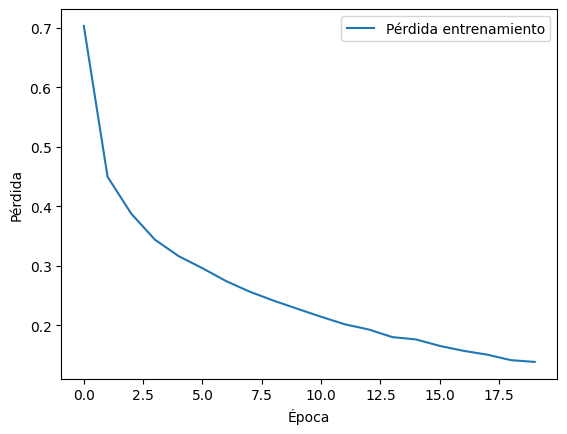

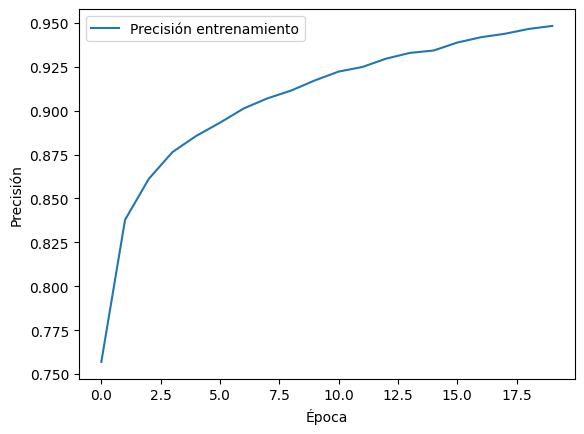

In [ ]:
#Grafica de Perdidas
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:
class_names = [
    "T-shirt/top",    # 0
    "Trouser",        # 1
    "Pullover",       # 2
    "Dress",          # 3
    "Coat",           # 4
    "Sandal",         # 5
    "Shirt",          # 6
    "Sneaker",        # 7
    "Bag",            # 8
    "Ankle boot"      # 9
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


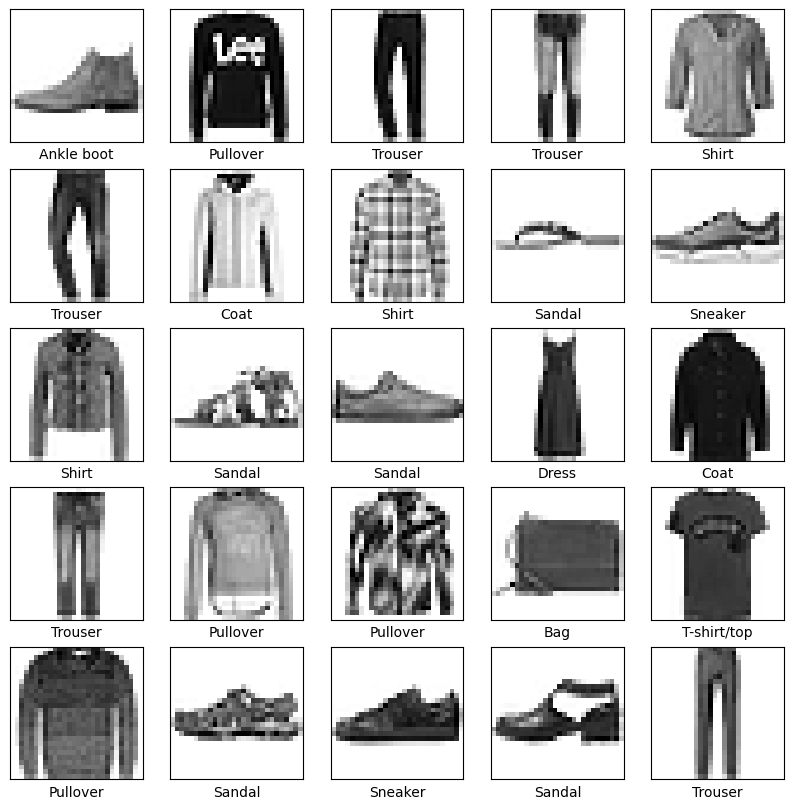

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  single_image = np.expand_dims(x_test[i], axis=0)
  prediction = model.predict(single_image)
  predicted_class = np.argmax(prediction)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[predicted_class])
plt.show()

In [ ]:
model.save('fashion_mnist.keras')